In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf


In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZCAH5A/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZCAH5A/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZCAH5A/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [8]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 772s 2s/step - loss: 0.6905 - accuracy: 0.5000 - val_loss: 0.6798 - val_accuracy: 0.4917
Epoch 2/10
391/391 [==============================] - 755s 2s/step - loss: 0.4750 - accuracy: 0.7483 - val_loss: 0.4326 - val_accuracy: 0.7771
Epoch 3/10
391/391 [==============================] - 752s 2s/step - loss: 0.2808 - accuracy: 0.8819 - val_loss: 0.3547 - val_accuracy: 0.8625
Epoch 4/10
391/391 [==============================] - 752s 2s/step - loss: 0.2209 - accuracy: 0.9138 - val_loss: 0.3452 - val_accuracy: 0.8552
Epoch 5/10
391/391 [==============================] - 747s 2s/step - loss: 0.1895 - accuracy: 0.9272 - val_loss: 0.3778 - val_accuracy: 0.8458
Epoch 6/10
391/391 [==============================] - 748s 2s/step - loss: 0.1648 - accuracy: 0.9393 - val_loss: 0.3883 - val_accuracy: 0.8500
Epoch 7/10
391/391 [==============================] - 746s 2s/step - loss: 0.1458 - accuracy: 0.9483 - val_loss: 0.4131 - val_accuracy: 0.8583

In [10]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [11]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [12]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 139s 356ms/step - loss: 0.4836 - accuracy: 0.8483
Test Loss: 0.48361238837242126
Test Accuracy: 0.8482800126075745


In [13]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.545876]]


In [14]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-3.405211]]


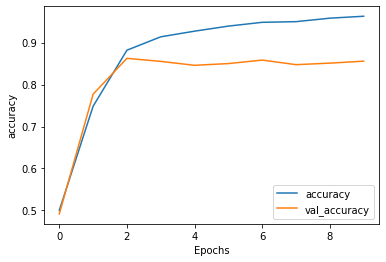

In [15]:
plot_graphs(history, 'accuracy')

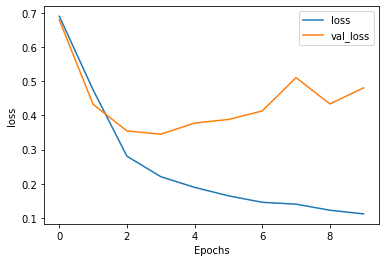

In [16]:
plot_graphs(history, 'loss')